In [1]:
%matplotlib widget

from lib.hamiltonian import H_D
from lib.sigma import sigma
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import itertools

# S = [3, 2, 8, 1]
S = [1, 10, 2, 3]
L = 6

x = np.array([[0,1],[1,0]])
x_hat = np.array([[0,0],[0,1]])
N = len(S)
Tf = 15
steps = 500
ts = np.linspace(0, Tf, steps)
Hf = np.zeros((2**N, 2**N))
Hi = np.zeros((2**N, 2**N))

for k in range(N):
    Hi += sigma(N, k, x, basis=2)
    Hf += S[k]*sigma(N, k, x_hat, basis=2)

Hi *= -1

Hf = Hf - L*np.eye(2**N)
Hf = Hf**2

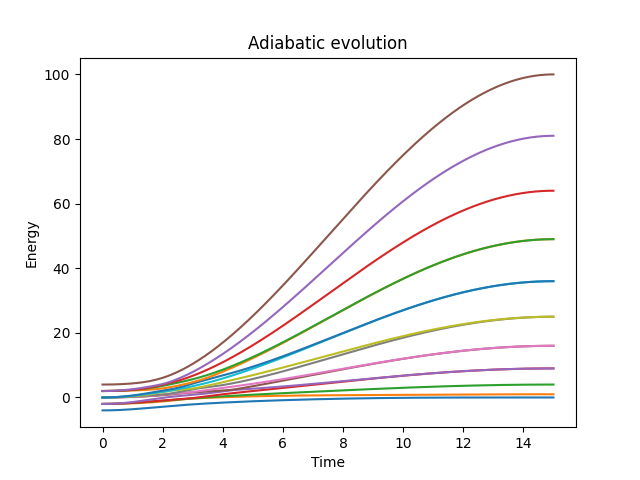

In [2]:
psi_0 = np.ones((2**N,), dtype=complex) / np.sqrt(2**N)

def gamma(t):
    return 0.5 * (1 - np.cos(np.pi * t / Tf))

vals = []

for t in ts:
    val, vec = np.linalg.eigh((1 - gamma(t)) * Hi + gamma(t) * Hf)
    vals.append(val)

plt.plot(ts, vals)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Adiabatic evolution")
plt.show()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.006e-02 ...  1.497e+01  1.500e+01]
        y: [[ 2.50000000e-01+0.j          2.48195074e-01+0.02998679j ...
              6.12607003e-03+0.00411937j  6.51294239e-03-0.00347541j]
            [ 2.50000000e-01+0.j          2.48195018e-01+0.02998746j ...
              2.33908238e-02-0.01204373j  1.93213238e-02-0.01785691j]
            ...
            [ 2.50000000e-01+0.j          2.48195122e-01+0.02998647j ...
              2.44782265e-04+0.00030617j  3.28610714e-04-0.00021369j]
            [ 2.50000000e-01+0.j          2.48195241e-01+0.02998521j ...
             -2.04348781e-03+0.00457601j  2.62300904e-03-0.00427165j]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3350
     njev: 0
      nlu: 0


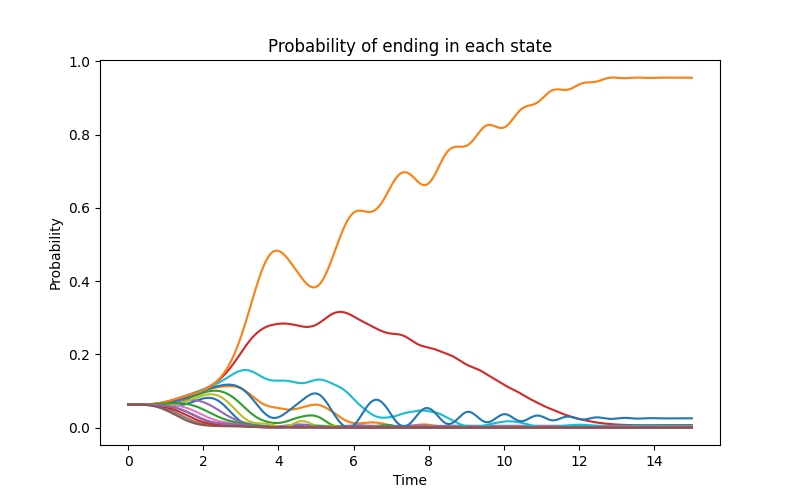

In [3]:
# Time-dependent RHS
def RHS(t, y):
    H = (1 - gamma(t)) * Hi + gamma(t) * Hf
    return (-1j * (H @ y))

    
sol = sp.integrate.solve_ivp(RHS, [0, Tf], psi_0, t_eval=ts, method='RK45')
probs = np.abs(sol.y)**2
print(sol)

plt.figure(figsize=(8, 5))
plt.plot(ts, probs.T)
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability of ending in each state")
plt.show()

In [4]:
last = probs[:,-1]
print(np.abs(last)**2)
midx = np.argmax(last)
def all_move_sequences(N):
    moves = (0, 1)
    return list(itertools.product(moves, repeat=N))

moves = all_move_sequences(N)
print(moves[midx])
print(S)

[2.96991194e-09 4.79116852e-07 5.32099160e-07 4.29048951e-05
 2.20320988e-05 4.70199374e-09 8.32875779e-08 3.66633845e-11
 2.61742639e-06 1.43449682e-05 6.31281987e-04 9.13123201e-01
 2.82282386e-07 1.08423944e-14 2.36080642e-14 6.31374759e-10]
(1, 0, 1, 1)
[1, 10, 2, 3]


Largest value found at index(11)


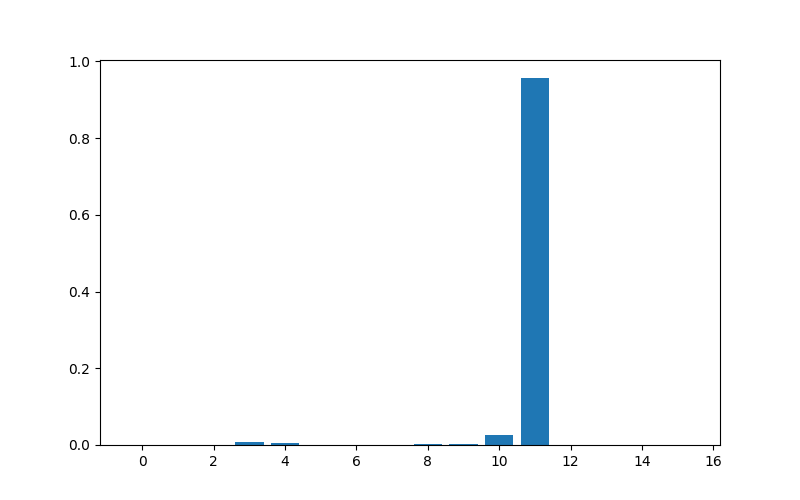

In [5]:
indecies = [i for i in range(2**N)]
print(f"Largest value found at index({midx})")
plt.figure(figsize=(8, 5))

plt.bar(indecies, last)
plt.show()

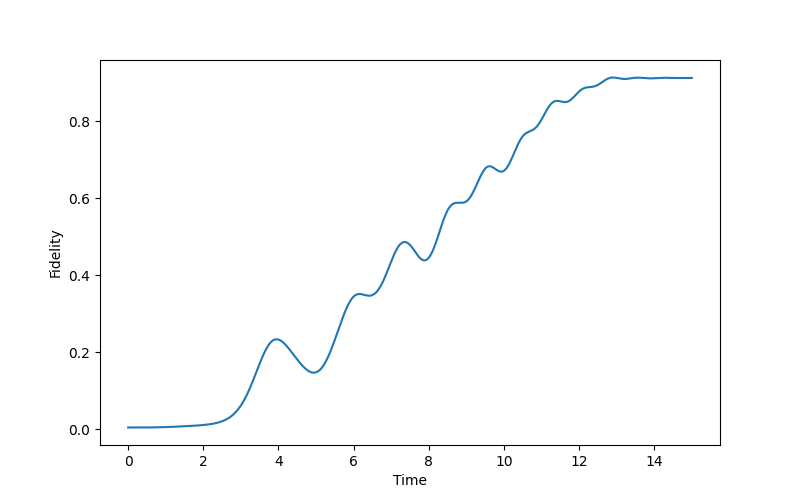

In [6]:
fids = []

for fid in probs.T:
    fids.append(np.abs(fid[midx])**2)

plt.figure(figsize=(8, 5))
plt.plot(ts, fids)
plt.xlabel("Time")
plt.ylabel("Fidelity")
plt.title("")
plt.show()